<a href="https://colab.research.google.com/github/Alejandro-ZZ/Machine-Learning-UNS/blob/master/TP_3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 3.2.**

Se realizará la **evaluación de hiperparámetros** y la combinación de los mismos para un clasificador de **k vecinos más cercanos** (knn). Se tomarán los siguientes parámetros:

- ***n_neighbors:*** número de vecinos (k)
- ***weights:*** función de peso. Se incluyen: 'uniform' y 'distance'
- ***metric:*** métrica usada para calcular la distancia. Se incluyen: 'euclidean', 'manhattan' y 'minkowski'.

Se implementa la función ***GridSearchCV*** para obtener los resultados de cada combinación.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from matplotlib.colors import ListedColormap

# **Dataset #2**

Segundo conjunto de datos de 2 dimensiones con distribución de campana. Implementado en el [ejercicio 3.1.](https://github.com/Alejandro-ZZ/Machine-Learning-UNS/blob/master/TP_3-1.ipynb)

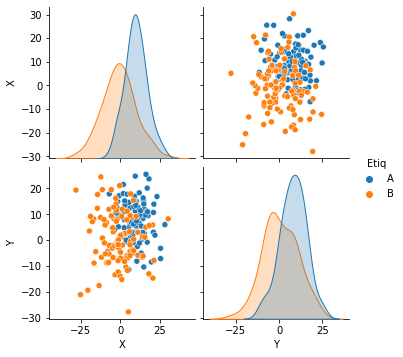

In [ ]:
np.random.seed(1)
features_number = 2

df_A2 = pd.DataFrame(np.random.normal(loc=8, scale=8, size=(100, features_number)),
                        columns=['X', 'Y'])
df_A2['Etiq'] = 'A'

df_B2 = pd.DataFrame(np.random.normal(scale=10, size=(100, features_number)),
                        columns=['X', 'Y'])
df_B2['Etiq'] = 'B'

dataset2 = pd.concat([df_A2, df_B2])
dataset2 = dataset2.reset_index().drop('index', axis=1)

sns.pairplot(dataset2, diag_kind="kde", hue='Etiq')

# **Análisis de hiperparámetros**

Se realiza la evaluación de los parámetros del clasificador ***'KNeighborsClassifier'***

## **Split 1:** 80% Train

Primero se realiza un análisis tomando un 80% de los datos para entrenamiento.

In [ ]:
# Se codifica las etiquetas del target a valores numéricos
le = LabelEncoder()
y = le.fit_transform(dataset2['Etiq'])

# Se extraen los atributos (features)
X = dataset2[['X', 'Y']]

# Se divide el dataset para entrenamiento (80% train) y prueba (20% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
train_rows, train_columns = X_train.shape

# Se escogen un máximo de K = N/2 +10
Ks = int(train_rows / 2 + 10)

Se implementa la validación cruzada K-Fold para conocer si el split realizado presenta influencia en el entrenamiento.

In [ ]:
from sklearn.model_selection import cross_val_score

dummy_clf = KNeighborsClassifier()
print(cross_val_score(dummy_clf, X_train, y_train, cv=5))

[0.71875 0.75    0.71875 0.84375 0.84375]


Se observa que el puntaje obtenido para cada validación no difiere en grandes margenes. Por ello se procede a evaluar a fondo el modelo por medio de GridSearchCV

In [ ]:
# Creación del modelo Knn
neigh = KNeighborsClassifier()

# Parametros a evaluar
# Por defecto Knn presenta -> weights: 'uniform' y metric: 'minkowski' (equivalente a 'standard Euclidean')
parameters = {
    'n_neighbors': [n for n in range(3,Ks)],
    'weights': ['uniform', 'distance'],
    'metric': ['chebyshev', 'manhattan', 'minkowski']
}

# Se implementa un valor de 5-folds (cv=5) usado en la validación cruzada
clf = GridSearchCV(neigh, parameters, cv=5, return_train_score=False)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['chebyshev', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Ahora, se ordenan los resultados y se interpretan

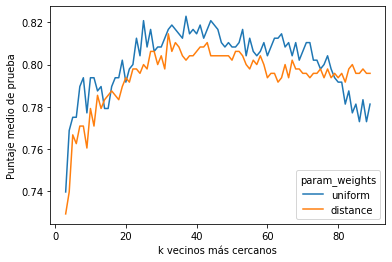

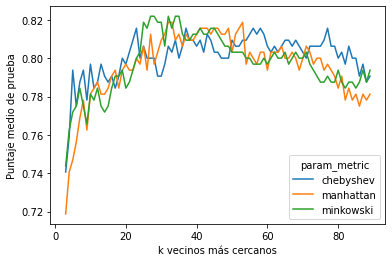

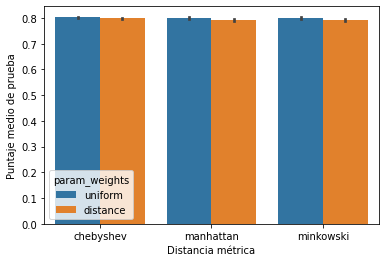


El mejor puntaje es 0.83125 con metric: chebyshev, weight: uniform y k = 37



In [ ]:
# Se toman los resultados y se convierten en un DataFrame
results = pd.DataFrame(clf.cv_results_)

# Se extraen los parametros y su respectiva puntuacion media 
grid_summary = results[['param_metric', 'param_n_neighbors', 'param_weights', 'mean_test_score']]

sns.lineplot(x='param_n_neighbors', y='mean_test_score', ci=None, hue='param_weights', data=grid_summary)
plt.xlabel('k vecinos más cercanos')
plt.ylabel('Puntaje medio de prueba')
plt.show()

sns.lineplot(x='param_n_neighbors', y='mean_test_score', ci=None, hue='param_metric', data=grid_summary)
plt.xlabel('k vecinos más cercanos')
plt.ylabel('Puntaje medio de prueba')
plt.show()

sns.barplot(x="param_metric", y="mean_test_score", hue="param_weights", data=grid_summary)
plt.xlabel('Distancia métrica')
plt.ylabel('Puntaje medio de prueba')
plt.show()

print("\nEl mejor puntaje es {} con metric: {}, weight: {} y k = {}\n".format(clf.best_score_, 
                                                                              clf.best_params_['metric'],
                                                                              clf.best_params_['weights'], 
                                                                              clf.best_params_['n_neighbors']))

Como se observa, la media máxima obtenida en la combinación de los parámetros es de un 0.83. Por ello, se filtran y ordenan los valores superiores a 0.8

In [ ]:
# Se escogen los puntajes superiores a 0.8
grid_summary.loc[grid_summary['mean_test_score'] > 0.8].sort_values(by = 'mean_test_score', ascending=False).head()

,param_metric,param_n_neighbors,param_weights,mean_test_score
68,chebyshev,37,uniform,0.83125
392,minkowski,25,uniform,0.83125
396,minkowski,27,uniform,0.83125
274,manhattan,53,uniform,0.83125
412,minkowski,35,uniform,0.83125


- Se observa que la mejor función de peso ***(weights)***, para el clasificador y el dataset en mención, es **uniform** hasta valores de k cercanos a 80.  

- Los comportamientos con mejores resultados se presentan conforme los **k vecinos más cercanos** aumenta hasta valores cercanos a k = 50

- Respecto al cálculo de la distancia ***(metric)***, se presenta un comportamiento similar para los tres parámetros evaluados

- La relación entre el parámetro ***(metric)*** y la función peso ***(weights)*** presentan puntajes muy similares

A partir de esta primera exploración se crea el modelo definitivo según el mejor puntaje obtenido y los parámetros con los que se lograron este.

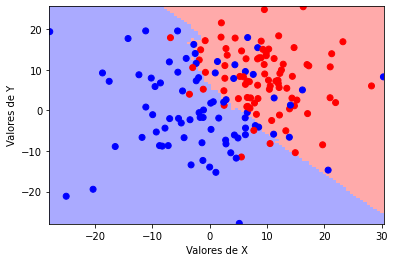

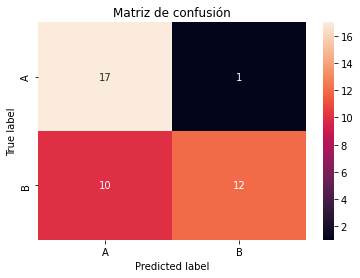

Exactitud = 0.725
Precision = 0.6296296296296297
Recall = 0.9444444444444444
F1-Score = 0.7555555555555556


In [ ]:
# Entrenamiento del modelo y predicción
neigh = KNeighborsClassifier(n_neighbors = 37, weights = 'uniform', metric = 'chebyshev').fit(X_train,y_train)
y_pred = neigh.predict(X_test)

# Crea un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Preparación para el gráfico 
x_min, x_max = X_train.iloc[:, 0].min() - .1, X_train.iloc[:, 0].max() + .1
y_min, y_max = X_train.iloc[:, 1].min() - .1, X_train.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Se grafica los datos de entrenamiento
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

plt.show()

# Matriz de confusión
confusion_matrix = pd.crosstab(le.inverse_transform(y_test), le.inverse_transform(y_pred), rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix, annot=True)
plt.title("Matriz de confusión")
plt.show()

# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix.iloc[0]['A']
FN_count = confusion_matrix.iloc[0]['B']
FP_count = confusion_matrix.iloc[1]['A']
TN_count = confusion_matrix.iloc[1]['B']


exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

print("Exactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1-Score = " + str(F1_score))

Para esta primera evaluación se obtiene una exactitud del 72.5% para la combinación de parámetros que mejor puntaje arrojó en la exploración con GirdSearchCV

## **Split 2:** 50% Train

El segundo análisis se realiza implementando un 50% de los datos para entrenamiento

In [ ]:
# Se divide el dataset para entrenamiento (50% train) y prueba (50% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
train_rows, train_columns = X_train.shape

# Se escogen un máximo de K = N/2 +10
Ks = int(train_rows / 2 + 10)

dummy_clf = KNeighborsClassifier()
print(cross_val_score(dummy_clf, X_train, y_train, cv=5))

[0.7  0.75 0.85 0.85 0.8 ]


El puntaje obtenido para cada validación no difiere en grandes margenes. Se procede al análisis por medio de GridSearchCV

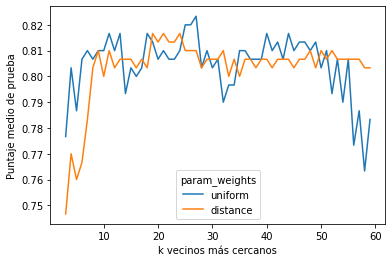

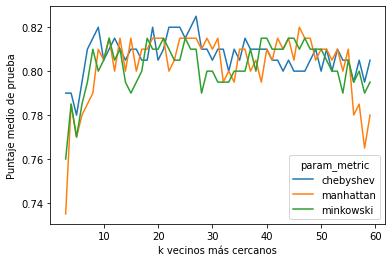

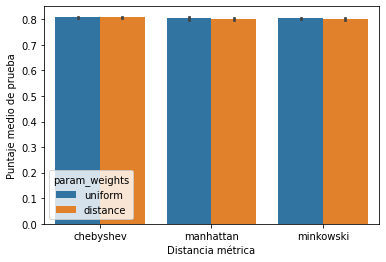


El mejor puntaje es 0.8300000000000001 con metric: chebyshev, weight: uniform y k = 8



In [ ]:
# Creación del modelo Knn
neigh = KNeighborsClassifier()

# Parametros a evaluar
# Por defecto Knn presenta -> weights: 'uniform' y metric: 'minkowski' (equivalente a 'standard Euclidean')
parameters = {
    'n_neighbors': [n for n in range(3,Ks)],
    'weights': ['uniform', 'distance'],
    'metric': ['chebyshev', 'manhattan', 'minkowski']
}

# Se implementa un valor de 5-folds (cv=5) usado en la validación cruzada
clf = GridSearchCV(neigh, parameters, cv=5, return_train_score=False)
clf.fit(X_train,y_train)

# Se toman los resultados y se convierten en un DataFrame
results = pd.DataFrame(clf.cv_results_)

# Se extraen los parametros y su respectiva puntuacion media 
grid_summary = results[['param_metric', 'param_n_neighbors', 'param_weights', 'mean_test_score']]

sns.lineplot(x='param_n_neighbors', y='mean_test_score', ci=None, hue='param_weights', data=grid_summary)
plt.xlabel('k vecinos más cercanos')
plt.ylabel('Puntaje medio de prueba')
plt.show()

sns.lineplot(x='param_n_neighbors', y='mean_test_score', ci=None, hue='param_metric', data=grid_summary)
plt.xlabel('k vecinos más cercanos')
plt.ylabel('Puntaje medio de prueba')
plt.show()

sns.barplot(x="param_metric", y="mean_test_score", hue="param_weights", data=grid_summary)
plt.xlabel('Distancia métrica')
plt.ylabel('Puntaje medio de prueba')
plt.show()

print("\nEl mejor puntaje es {} con metric: {}, weight: {} y k = {}\n".format(clf.best_score_, 
                                                                              clf.best_params_['metric'],
                                                                              clf.best_params_['weights'], 
                                                                              clf.best_params_['n_neighbors']))

In [ ]:
# Se escogen los puntajes superiores a 0.8
grid_summary.loc[grid_summary['mean_test_score'] > 0.8].sort_values(by = 'mean_test_score', ascending=False).head()

,param_metric,param_n_neighbors,param_weights,mean_test_score
48,chebyshev,27,uniform,0.83
10,chebyshev,8,uniform,0.83
200,manhattan,46,uniform,0.83
41,chebyshev,23,distance,0.83
43,chebyshev,24,distance,0.83


- Se observa que para los k > 36 con el parámetro **weights: distance** el modelo no presenta cambios significativos.

- Para valores de k > 50, con w**eights: uniform** el modelo tiende a disminuir su puntaje.

- En general para las variables evaluadas en en el parámetro metric se observa un comportamiento similar. Sin embargo para los k > 55 con **metric = manhattan** el modelo tiende a desmejorar.

Con los resultado arrojados, se genera el modelo para este split. 

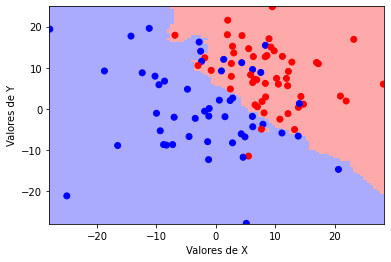

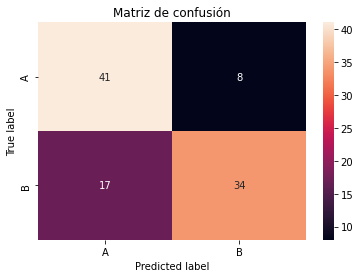

Exactitud = 0.75
Precision = 0.7068965517241379
Recall = 0.8367346938775511
F1-Score = 0.7663551401869159


In [ ]:
# Entrenamiento del modelo y predicción
neigh = KNeighborsClassifier(n_neighbors = 23, weights = 'distance', metric = 'chebyshev').fit(X_train,y_train)
y_pred = neigh.predict(X_test)

# Crea un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Preparación para el gráfico 
x_min, x_max = X_train.iloc[:, 0].min() - .1, X_train.iloc[:, 0].max() + .1
y_min, y_max = X_train.iloc[:, 1].min() - .1, X_train.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Se grafica los datos de entrenamiento
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

plt.show()

# Matriz de confusión
confusion_matrix = pd.crosstab(le.inverse_transform(y_test), le.inverse_transform(y_pred), rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix, annot=True)
plt.title("Matriz de confusión")
plt.show()

# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix.iloc[0]['A']
FN_count = confusion_matrix.iloc[0]['B']
FP_count = confusion_matrix.iloc[1]['A']
TN_count = confusion_matrix.iloc[1]['B']


exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

print("Exactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1-Score = " + str(F1_score))

Ahora con la combinación de parámetros encontrados y un 50% de los datos para entrenamiento, se obtiene un modelo con **exactitud del 75%**

## **Split 3:** 30% Train

Finalmente se dividen los datos para un 30% de entrenamiento.

In [ ]:
# Se divide el dataset para entrenamiento (30% train) y prueba (70% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.7, random_state=4)
train_rows, train_columns = X_train.shape

# Se escogen un máximo de K = N/2 +10
Ks = int(train_rows / 2 + 10)

dummy_clf = KNeighborsClassifier()
print(cross_val_score(dummy_clf, X_train, y_train, cv=5))

[0.91666667 0.83333333 0.91666667 0.75       0.91666667]


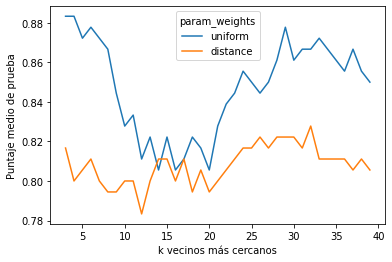

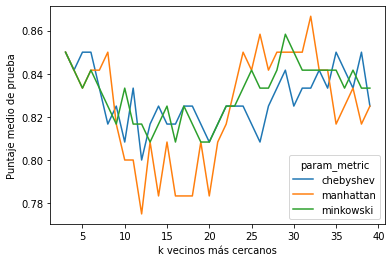

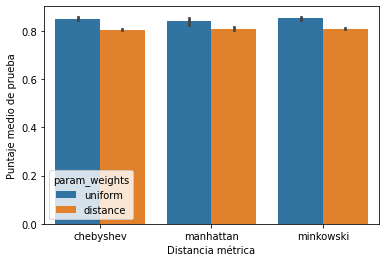


El mejor puntaje es 0.9 con metric: manhattan, weight: uniform y k = 32



In [ ]:
# Creación del modelo Knn
neigh = KNeighborsClassifier()

# Parametros a evaluar
# Por defecto Knn presenta -> weights: 'uniform' y metric: 'minkowski' (equivalente a 'standard Euclidean')
parameters = {
    'n_neighbors': [n for n in range(3,Ks)],
    'weights': ['uniform', 'distance'],
    'metric': ['chebyshev', 'manhattan', 'minkowski']
}

# Se implementa un valor de 5-folds (cv=5) usado en la validación cruzada
clf = GridSearchCV(neigh, parameters, cv=5, return_train_score=False)
clf.fit(X_train,y_train)

# Se toman los resultados y se convierten en un DataFrame
results = pd.DataFrame(clf.cv_results_)

# Se extraen los parametros y su respectiva puntuacion media 
grid_summary = results[['param_metric', 'param_n_neighbors', 'param_weights', 'mean_test_score']]

sns.lineplot(x='param_n_neighbors', y='mean_test_score', ci=None, hue='param_weights', data=grid_summary)
plt.xlabel('k vecinos más cercanos')
plt.ylabel('Puntaje medio de prueba')
plt.show()

sns.lineplot(x='param_n_neighbors', y='mean_test_score', ci=None, hue='param_metric', data=grid_summary)
plt.xlabel('k vecinos más cercanos')
plt.ylabel('Puntaje medio de prueba')
plt.show()

sns.barplot(x="param_metric", y="mean_test_score", hue="param_weights", data=grid_summary)
plt.xlabel('Distancia métrica')
plt.ylabel('Puntaje medio de prueba')
plt.show()

print("\nEl mejor puntaje es {} con metric: {}, weight: {} y k = {}\n".format(clf.best_score_, 
                                                                              clf.best_params_['metric'],
                                                                              clf.best_params_['weights'], 
                                                                              clf.best_params_['n_neighbors']))

In [ ]:
# Se escogen los puntajes superiores a 0.8
grid_summary.loc[grid_summary['mean_test_score'] > 0.8].sort_values(by = 'mean_test_score', ascending=False).head()

,param_metric,param_n_neighbors,param_weights,mean_test_score
132,manhattan,32,uniform,0.900000
200,minkowski,29,uniform,0.900000
64,chebyshev,35,uniform,0.883333
130,manhattan,31,uniform,0.883333
4,chebyshev,5,uniform,0.883333


- En este análisis se observa que esta vez para **weight = uniform**, el modelo presenta significativamente un mejor comportamiento en contraste con distance.

- Nuevamente el comportamiento para el parámetro metric es muy similar.

- En este split, se obtiene el mayor puntaje respecto a los otros dos splits en la evaluacion con GridSearchCV.

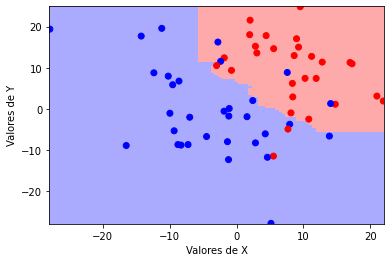

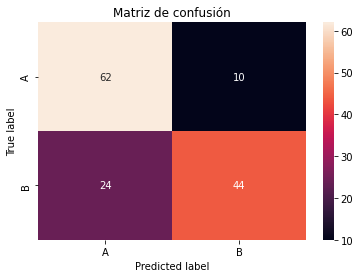

Exactitud = 0.7571428571428571
Precision = 0.7209302325581395
Recall = 0.8611111111111112
F1-Score = 0.7848101265822784


In [ ]:
# Entrenamiento del modelo y predicción
neigh = KNeighborsClassifier(n_neighbors = 32, weights = 'uniform', metric = 'manhattan').fit(X_train,y_train)
y_pred = neigh.predict(X_test)

# Crea un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Preparación para el gráfico 
x_min, x_max = X_train.iloc[:, 0].min() - .1, X_train.iloc[:, 0].max() + .1
y_min, y_max = X_train.iloc[:, 1].min() - .1, X_train.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Se grafica los datos de entrenamiento
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

plt.show()

# Matriz de confusión
confusion_matrix = pd.crosstab(le.inverse_transform(y_test), le.inverse_transform(y_pred), rownames=['True label'], colnames=['Predicted label'])

sns.heatmap(confusion_matrix, annot=True)
plt.title("Matriz de confusión")
plt.show()

# Se obtienen la cuenta para cada condicion
TP_count = confusion_matrix.iloc[0]['A']
FN_count = confusion_matrix.iloc[0]['B']
FP_count = confusion_matrix.iloc[1]['A']
TN_count = confusion_matrix.iloc[1]['B']


exactitud = (TP_count + TN_count) / (TP_count + TN_count + FN_count + FP_count)
precision = (TP_count) / (TP_count + FP_count)
recall = (TP_count) / (TP_count + FN_count)
F1_score = (2*precision*recall) / (precision + recall)

print("Exactitud = " + str(exactitud))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1-Score = " + str(F1_score))

La exactitud del modelo aumenta levemente respecto al split 2. 

# **Conclusión**

- Para el dataset generado, los mejores resultados se dieron para el split 2: 50% Train y split 3: 30% Train.

- Por medio de la validación cruzada K-Fold se analiza el dataset obtenido para entrenamiento y se verifica que el mismo no tenga influencia en el modelo

- A partir de un análisis más extenso con la función **GridSearchCV** se pueden evaluar la combinación de distintos hiperparámetros. En este caso se realizó unicamente para un modelo Knn, sin embargo, se pueden incluir otros modelos de clasificación y observar su comportamiento para los datos específicos.

- Si bien este análisis exploratorio con **GridSearchCV** puede llegar a consumir recursos significativos de computación, existen funciones análogas de reducción como [HalvingGridsearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html#sklearn.model_selection.HalvingGridSearchCV). 

- En este laboratorio se eligen la combinación de parámetros que obtuvieron la media de puntaje más alto. Sin embargo, en casos prácticos esta desición depende de otras variables que permiten dar contexto a la aplicación final.